# Importation des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from cnn_model import CNN

# Importation du dataset 

In [2]:
# Chargement du dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Normalisation des données
X = X / 255.0
X = X.values.reshape(-1, 28, 28)

# Conversion des labels en one-hot encoding
y_one_hot = np.zeros((y.size, y.max()+1))
y_one_hot[np.arange(y.size), y] = 1

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42)

# Pour réduire le temps d'exécution, on prend un sous-ensemble
X_train_small = X_train[:2000]
y_train_small = y_train[:2000]
X_test_small = X_test[:1000]
y_test_small = y_test[:1000]

# Création du modèle et training

Epoch 1/5, Loss: 2.303539006760155
Epoch 2/5, Loss: 2.302343261942152
Epoch 3/5, Loss: 2.3016436243247007
Epoch 4/5, Loss: 2.301126130258917
Epoch 5/5, Loss: 2.3007074294157817


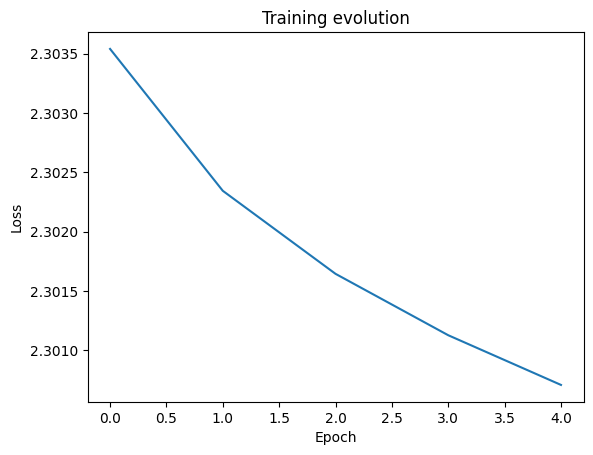

In [6]:
conv_params = {
    'num_filters': 8,
    'filter_size': 3,
    'stride': 1,
    'pad': 1,
    'pool_size': 2,
    'pool_stride': 2
}
cnn = CNN(input_shape=(28,28), conv_params=conv_params, hidden_sizes=[128], output_size=10)

# Entraînement du modèle
losses = cnn.train(X_train_small, y_train_small, epochs=5, learning_rate=0.01)

plt.plot(losses)
plt.title("Training evolution")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Evaluation du modèle

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = cnn.predict(X_test_small)

# Conversion des probabilités en labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_small, axis=1)

# Calcul de l'accuracy
accuracy = np.mean(y_pred_labels == y_true_labels)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Affichage de quelques prédictions
for i in range(5):
    plt.imshow(X_test_small[i], cmap='gray')
    plt.title(f"Vrai : {y_true_labels[i]}, Prédit : {y_pred_labels[i]}")
    plt.show()